In [2]:
# import the necessary packages
import os
 
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "malaria/cell_images"
 
# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "malaria"
 
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])
 
# define the amount of data that will be used training
TRAIN_SPLIT = 0.8
 
# the amount of validation data will be a percentage of the
# *training* data
VAL_SPLIT = 0.1

In [3]:

# import the necessary packages
from pyimagesearch import config
from imutils import paths
import random
import shutil
import os
 
# grab the paths to all input images in the original input directory
# and shuffle them
imagePaths = list(paths.list_images(config.ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)

In [4]:
# compute the training and testing split
i = int(len(imagePaths) * config.TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]
 
# we'll be using part of the training data for validation
i = int(len(trainPaths) * config.VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

In [5]:
# define the datasets that we'll be building
datasets = [
	("training", trainPaths, config.TRAIN_PATH),
	("validation", valPaths, config.VAL_PATH),
	("testing", testPaths, config.TEST_PATH)
]

In [6]:
# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))
 
	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)
 
	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image along with its
		# corresponding class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]
 
		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])
 
		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)
 
		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

[INFO] building 'training' split
[INFO] building 'validation' split
[INFO] building 'testing' split


In [7]:


# define the total number of epochs to train for along with the
# initial learning rate and batch size
NUM_EPOCHS = 50
INIT_LR = 1e-1
BS = 32
 
def poly_decay(epoch):
	# initialize the maximum number of epochs, base learning rate,
	# and power of the polynomial
	maxEpochs = NUM_EPOCHS
	baseLR = INIT_LR
	power = 1.0
 
	# compute the new learning rate based on polynomial decay
	alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
 
	# return the new learning rate
	return alpha

In [8]:
# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(config.TRAIN_PATH)))
totalVal = len(list(paths.list_images(config.VAL_PATH)))
totalTest = len(list(paths.list_images(config.TEST_PATH)))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
	rescale=1 / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.05,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation (and testing) data augmentation object
valAug = ImageDataGenerator(rescale=1 / 255.0)

In [28]:
# initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)

# initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

# initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

type(testGen)


Found 19842 images belonging to 2 classes.
Found 2204 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


keras_preprocessing.image.directory_iterator.DirectoryIterator

In [12]:
#Train Model Script

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from pyimagesearch.resnet import ResNet
from pyimagesearch import config
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] [-p PLOT]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\amite\AppData\Roaming\jupyter\runtime\kernel-28e32a7b-a249-4594-b68e-280c92330d63.json


SystemExit: 2

C:\Users\amite\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
import keras

In [14]:
# initialize our ResNet model and compile it
model = ResNet.build(64, 64, 3, 2, (3, 4, 6),
	(64, 128, 256, 512), reg=0.0005)
opt = SGD(lr=INIT_LR, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

W1012 01:38:25.620622  7628 deprecation_wrapper.py:119] From C:\Users\amite\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1012 01:38:25.656560  7628 deprecation_wrapper.py:119] From C:\Users\amite\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1012 01:38:25.684507  7628 deprecation_wrapper.py:119] From C:\Users\amite\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1012 01:38:25.685508  7628 deprecation_wrapper.py:119] From C:\Users\amite\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1012 01:38:25.686478  7628 deprecation_wrapper.py:11

In [15]:
# define our set of callbacks and fit the model
callbacks = [LearningRateScheduler(poly_decay)]
H = model.fit_generator(
	trainGen,
	steps_per_epoch=totalTrain // BS,
	validation_data=valGen,
	validation_steps=totalVal // BS,
	epochs=NUM_EPOCHS,
	callbacks=callbacks)

Epoch 1/50
620/620 [==============================] - 69s 111ms/step - loss: 1.1862 - acc: 0.7187 - val_loss: 0.7294 - val_acc: 0.9403
Epoch 2/50
620/620 [==============================] - 60s 96ms/step - loss: 0.6515 - acc: 0.9402 - val_loss: 0.5633 - val_acc: 0.9494
Epoch 3/50
620/620 [==============================] - 60s 96ms/step - loss: 0.6900 - acc: 0.9353 - val_loss: 0.7876 - val_acc: 0.9424
Epoch 4/50
620/620 [==============================] - 61s 98ms/step - loss: 0.6559 - acc: 0.9494 - val_loss: 0.5625 - val_acc: 0.9549
Epoch 5/50
620/620 [==============================] - 61s 98ms/step - loss: 0.5167 - acc: 0.9487 - val_loss: 0.4577 - val_acc: 0.9572
Epoch 6/50
620/620 [==============================] - 60s 97ms/step - loss: 0.4469 - acc: 0.9476 - val_loss: 0.4961 - val_acc: 0.9424
Epoch 7/50
620/620 [==============================] - 61s 98ms/step - loss: 0.4643 - acc: 0.9449 - val_loss: 0.4066 - val_acc: 0.9549
Epoch 8/50
620/620 [==============================] - 60s 97m

In [131]:
print(H), type(H) ,np.size(H)

(None, keras.callbacks.History, 1)

In [32]:
# save the best model and early stopping
saveBestModel = keras.callbacks.ModelCheckpoint('/best_model.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


In [34]:
import pickle 
Trained_model = 'H(70_30).sav'
pickle.dump(H, open(Trained_model, 'wb'))

In [101]:
type (testGen)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [41]:
# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = model.predict_generator(testGen,
	steps=(totalTest // BS) + 1)

print(predIdxs)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))

type(predIdxs)

[INFO] evaluating network...
[[9.9891698e-01 1.0830661e-03]
 [9.9966955e-01 3.3044428e-04]
 [9.8856121e-01 1.1438799e-02]
 ...
 [3.1474668e-01 6.8525332e-01]
 [6.6206683e-03 9.9337935e-01]
 [9.9068648e-01 9.3134744e-03]]
              precision    recall  f1-score   support

 Parasitized       0.98      0.96      0.97      2726
  Uninfected       0.96      0.98      0.97      2786

    accuracy                           0.97      5512
   macro avg       0.97      0.97      0.97      5512
weighted avg       0.97      0.97      0.97      5512



numpy.ndarray

In [361]:
from PIL import Image
pngfile1= Image.open("C5NThinF_IMG_20150609_122020_cell_230.png")

In [362]:
from keras.preprocessing.image import img_to_array
type(pngfile1)

PIL.PngImagePlugin.PngImageFile

In [363]:
import tensorflow as tf
def preprocess_image(image, target_size):
    if image.mode != "RGB" :
        image= image.convert("RGB")
    
    image= image.resize(target_size)
    image= img_to_array(image)
    image= np.reshape(image, [64,64,3])
    image/=255
    image= np.expand_dims(image,0)

    return image

In [364]:
processed=[]
processed.append(preprocess_image(pngfile1,(64,64)))
#processed.append(preprocess_image(pngfile2,(64,64)))

In [365]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [366]:
np.shape(processed)

(1, 1, 64, 64, 3)

In [374]:
prediction= model.predict(processed)
prob=model.predict(processed)
print ("The Probabilities of being uninfected and Parasitized respectively are:",prob*100,"%")
prediction= np.argmax(prediction, axis=1)
if (prediction==1):
    print ("Hence the cell is Parasitized")
else:
    print ("Hence the cell is Uninfected")
    

The Probabilities of being uninfected and Parasitized respectively are: [[20.374086 79.62591 ]] %
Hence the cell is Parasitized


In [368]:
import joblib
malaria_model = "best.pkl"   
joblib.dump(model, malaria_model)

['best.pkl']

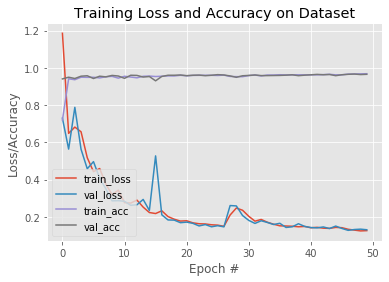

In [369]:
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [22]:
%matplotlib inline